## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score


In [2]:
# your code and solutions
# Read the CSV file into a DataFrame
data = pd.read_csv('cleaned_ecommerce_dataset.csv')
print("The length of the dataset is:" , len (data))

The length of the dataset is: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
#using Head Function to see have an idea about the data
data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [4]:
#using info Function to see the what kind of data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [5]:
# Using OrdinalEncoder for Categorical Encoding
from sklearn.preprocessing import OrdinalEncoder
# Creating an instance of OrdinalEncoder
ordinal_encoder= OrdinalEncoder()
# Encoding the 'gender', 'category', and 'review' columns using OrdinalEncoder
data['gender']=  ordinal_encoder.fit_transform(data[['gender']])
data['category']=  ordinal_encoder.fit_transform(data[['category']])
data['review']=  ordinal_encoder.fit_transform(data[['review']])

In [6]:
data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,1618.0,McDonald's,4.0,3.0,1.0,8.0,41,30.74,4
1,4081,72000,1125.0,Taco Bell,1.0,4.0,1.0,8.0,74,108.30,4
2,4081,72000,2185.0,Wendy's,5.0,4.0,1.0,8.0,84,69.00,4
3,4081,100399,2243.0,"South Park: Bigger, Longer & Uncut",5.0,3.0,1.0,5.0,68,143.11,4
4,4081,100399,1033.0,American Pie,3.0,3.0,1.0,5.0,6,117.89,4


In [7]:
correlations = data[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()
print (correlations)


             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000


In [8]:
print(correlations['rating'])


helpfulness   -0.007523
gender        -0.034337
category      -0.163158
review        -0.036118
rating         1.000000
Name: rating, dtype: float64


# Analysis on the Correlations:
* The two most correlated features with rating are:
   1. __category__ with a correlation coefficient of -0.163158.
   2. __gender__ with a correlation coefficient of -0.034337.
 The negative correlation coefficients indicate that as the values of these features increase, the rating tends to decrease.
* The two least correlated features with rating are:
   1. __helpfulness__ with a correlation coefficient of -0.007523.
   2. __review__ with a correlation coefficient of -0.036118.
 These correlation coefficients are close to zero, indicating very weak correlations.
  
# Affect on the Final Prediction Results
__category__ and __gender__ could potentially improve prediction results due to their moderate correlations with rating, __helpfulness__ and __review__ may not contribute much to prediction accuracy.

The __negative correlations__ indicate that higher values of these features correspond to lower ratings. Therefore, the regression model is likely to assign lower ratings when an item belongs to certain categories or is rated by a specific gender.

The __minimal correlation__ suggests that variations in the features __helpfulness__ and __reviews__  do not strongly influence the assigned rating. Thus, the regression model may assign ratings irrespective of the helpfulness of reviews or the content of the review.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

# Case1 : Training data containing 10% of the entire data

In [30]:
train, test = train_test_split(data, test_size=0.9, random_state=142)
print(train.shape)
print(test.shape)

#Model A
reg= linear_model.LinearRegression()
X_train = train[["category" , "gender"]]
y_train = train["rating"]

X_test = test[["category" , "gender"]]
y_test = test["rating"]

reg.fit(X_train,y_train)

predicted = reg.predict(X_test)
mse_a = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
Rmse_a = np.sqrt(mse_a)
print("MSE _a:", mse_a) 
print("Root mse_a: ",Rmse_a )



(268, 11)
(2417, 11)
MSE _a: 1.7723033271831938
Root mse_a:  1.3312788314936859


In [31]:
#ModelB
reg= linear_model.LinearRegression()
X_train = train[["helpfulness" , "review"]]
y_train = train["rating"]

X_test = test[["helpfulness" , "review"]]
y_test = test["rating"]

reg.fit(X_train,y_train)

predicted = reg.predict(X_test)
mse_b = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
print("MSE_b:", mse_b) 
Rmse_b = np.sqrt(mse_b)
print("Root mse_b: ", Rmse_b)


MSE_b: 1.83964890692985
Root mse_b:  1.3563365758283783


# Case 2: Training data containing 90% of the entire data.

In [32]:
train, test = train_test_split(data, test_size=0.10, random_state=142)
print(train.shape)
print(test.shape)

#Model C
reg= linear_model.LinearRegression()
X_train = train[["category" , "gender"]]
y_train = train["rating"]

X_test = test[["category" , "gender"]]
y_test = test["rating"]

reg.fit(X_train,y_train)

predicted = reg.predict(X_test)
mse_c = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
print("MSE_c:", mse_c) 
Rmse_c = np.sqrt(mse_c)
print("Root mse_b: ", Rmse_c)


(2416, 11)
(269, 11)
MSE_c: 1.779660383099854
Root mse_b:  1.334039123526688


In [33]:
#Model D
reg= linear_model.LinearRegression()
X_train = train[["helpfulness" , "review"]]
y_train = train["rating"]

X_test = test[["helpfulness" , "review"]]
y_test = test["rating"]

reg.fit(X_train,y_train)

predicted = reg.predict(X_test)
mse_d = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
print("MSE_d:", mse_d)
Rmse_d = np.sqrt(mse_d)
print("Root mse_b: ", Rmse_d)


MSE_d: 1.7890363900010227
Root mse_b:  1.3375486495828937


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

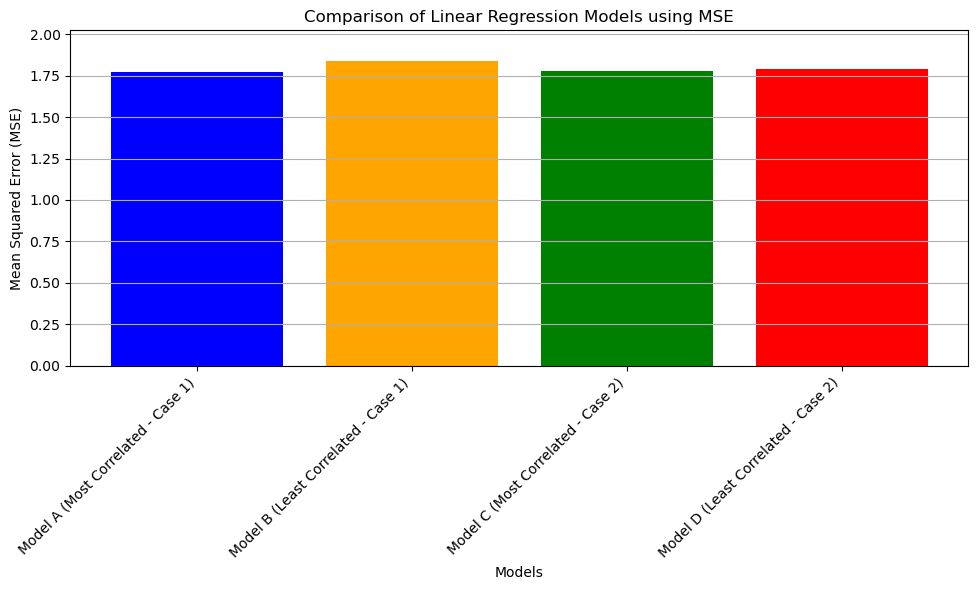

In [29]:
# Mean Squared Error values for each model
mse_values = [mse_a, mse_b, mse_c, mse_d]

# Model labels
model_labels = ['Model A (Most Correlated - Case 1)', 'Model B (Least Correlated - Case 1)', 
                'Model C (Most Correlated - Case 2)', 'Model D (Least Correlated - Case 2)']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_labels, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Linear Regression Models using MSE')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(mse_values) * 1.1)  # Set y-axis scale for better visualization
plt.grid(axis='y')
plt.tight_layout()
plt.show()


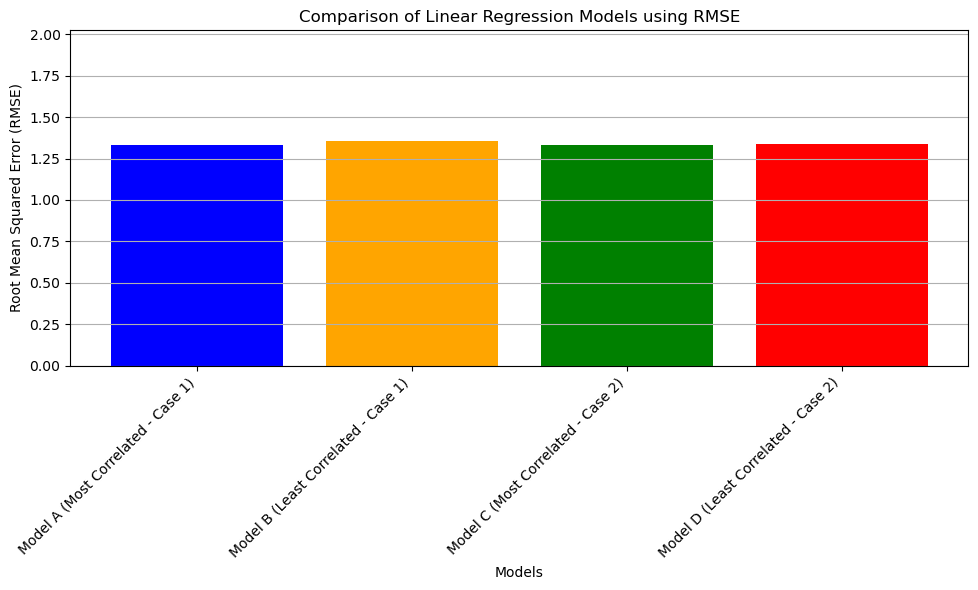

In [34]:
# Root Mean Squared Error values for each model
Rmse_values = [Rmse_a, Rmse_b, Rmse_c, Rmse_d]

# Model labels
model_labels = ['Model A (Most Correlated - Case 1)', 'Model B (Least Correlated - Case 1)', 
                'Model C (Most Correlated - Case 2)', 'Model D (Least Correlated - Case 2)']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_labels, Rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Linear Regression Models using RMSE')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(mse_values) * 1.1)  # Set y-axis scale for better visualization
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Model Performance:
__Model A__ (trained with the most correlated features in Case 1) has the __lowest MSE__, indicating better performance compared to other models.
__Model D__ (trained with the least correlated features in Case 2) has the __highest MSE__, suggesting poorer performance.

The __RMSE values__ closely follow the MSE trend, with __Model A__ having the __lowest RMSE__ and __Model D__ having the __highest RMSE__.

# Influence of Features and Training Data:
Models trained with the most correlated features and more training data will perform better, Model A outperforms Model C, which is trained with the same features but more training data.

This suggests that the quality and relevance of features might have a more significant impact on model performance than the quantity of training data.

# Possible Reasons:
The inclusion of irrelevant or weakly correlated features in Model C might dilute the model's ability to learn meaningful patterns from the data, leading to inferior performance despite having more training data.

Additionally, the 10% training data used in Case 1 might have been sufficient for Model A to capture the underlying relationships between features and ratings effectively.




### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


The 2008 Summer Olympics medal__ tallies are displayed in the tables, which are arranged by total medals and gold medals earned by each nation. The data is factual in and of itself, but the way it is presented raises ethical questions.

__Bias towards Medals:__ When countries are ranked according to their total medal count, those with larger delegations or more events may be given more weight than others. This can eclipse the accomplishments of nations that have won more gold medals overall but fewer overall medals.

__Nationalistic Bias__: Placing nations, like China or the United States, at the top of the list may unintentionally foster nationalistic sentiments. This could weaken the spirit of international collaboration and sportsmanship by fostering prejudices and rivalries between countries.

__Underrepresentation of Other Achievements__: Individual performances or historical significance may be overlooked if one is just concerned with gold medals or total medal tallies. An incomplete view of the Olympic Games and its participants may result from this restricted emphasis.

In conclusion, infographics are helpful tools for informational purposes, but it's crucial to display data in a way that promotes diversity, justice, and appreciation for the variety of accomplishments within the Olympic movement—all while avoiding bias.
